Q5

In [37]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def newton_method(f :Callable, x_0 : int) -> np.array:
    x = [x_0]
    tol = 0.000001
    curr_tol = 1
    while curr_tol > tol:
        x.append(x[-1] - f(x[-1]))
        curr_tol = abs(x[-1] - x[-2])
    return np.array(x)

def modified_newton(f: Callable, x_0: int, k: int) -> np.array:
    x = [x_0]
    tol = 0.000001
    curr_tol = 1
    while curr_tol > tol:
        x.append(x[-1] - k * f(x[-1]))
        curr_tol = abs(x[-1] - x[-2])
    return np.array(x)

In [88]:
# numerically stable version of the function
f = lambda x: 1/((x-1)*np.exp(1-x)) - x/(x-1)
k = 2
alpha = 1
# RNG
rand = np.random.default_rng()
# 20 randon numbers (uniformly)
# adjust for range [-1, 10] a good
# neighborhood around the root
starts = np.linspace(-1, 3, 5)
out_newt = []
out_impr = []

for x0 in starts:
    # We append a vector of error to the root given an inital guess
    out_newt.append(np.abs(newton_method(f,  x0) - alpha))
    out_impr.append(np.abs(modified_newton(f,x0,k) - alpha))

/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_25657/86256829.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/((x-1)*np.exp(1-x)) - x/(x-1)
/var/folders/kz/3r71r65n5wj2pd5__r_bk_3r0000gn/T/ipykernel_25657/86256829.py:2: RuntimeWarning: invalid value encountered in double_scalars
  f = lambda x: 1/((x-1)*np.exp(1-x)) - x/(x-1)


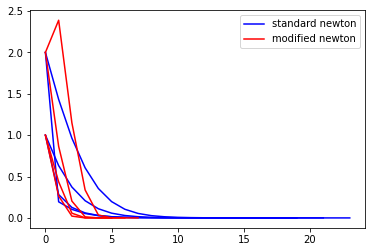

In [89]:
# Plotting for normal Newton method
plt.plot(out_newt.pop(), 'b-', label='standard newton')
for e1 in out_newt:
    plt.plot(e1, 'b-')
 
plt.plot(out_impr.pop(), 'r-', label='modified newton')
for e2 in out_impr:
    plt.plot(e2, 'r-')

plt.legend()
plt.show()

Q7

In [13]:
def comp_trap(f: Callable, a: float, b: float, h: float) -> float:
    x = np.arange(a + h, b, h)
    return h*(sum([f(xi) for xi in x]) + 0.5*f(a) + 0.5*f(b))
    
def impr_trap(f: Callable, g: Callable, a: float, b: float, h: float) -> float:
    return comp_trap(f, a, b, h) - (1/12)*(h**2)*(g(b)-g(a))

In [20]:
hs = np.linspace(0.005, 1, 100)
out_trap = np.zeros(len(hs))
out_impr = np.zeros(len(hs))
f = lambda x: np.exp(-1*x**2)
g = lambda x: -2*x*np.exp(-1*x**2)
for i in range(len(hs)):
    out_trap[i] = comp_trap(f, 1.0, 2.0, hs[i])
    out_impr[i] = impr_trap(f, g, 1.0, 2.0, hs[i])
true = 0.135257258

[0.13535022 0.13542536 0.13536919 0.13569186 0.13610413 0.1363476
 0.13634728 0.13661748 0.13617141 0.1367592  0.1369817  0.13684035
 0.13624072 0.13798938 0.13689349 0.13846471 0.13974745 0.13822949
 0.13957181 0.14071881 0.13836543 0.13972049 0.14092201 0.1419944
 0.14295906 0.13959125 0.14089628 0.14209835 0.14321055 0.14424479
 0.14521184 0.14612142 0.14698227 0.14187829 0.14318873 0.14443805
 0.14563208 0.14677631 0.14787587 0.14893557 0.14995992 0.1509531
 0.15191903 0.15286132 0.15378335 0.15468822 0.1555788  0.15645775
 0.15732749 0.15819027 0.15029757 0.15167684 0.1530325  0.15436622
 0.1556796  0.15697422 0.15825159 0.15951319 0.16076044 0.16199472
 0.16321736 0.16442966 0.16563285 0.16682813 0.16801666 0.16919953
 0.17037783 0.17155257 0.17272473 0.17389525 0.17506503 0.17623493
 0.17740576 0.1785783  0.1797533  0.18093146 0.18211344 0.18329989
 0.18449138 0.1856885  0.18689177 0.18810168 0.18931871 0.19054329
 0.19177581 0.19301667 0.19426621 0.19552476 0.19679259 0.19807
 

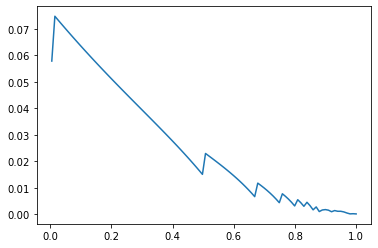

In [21]:

print(out_trap)
plt.plot(hs[::-1], np.abs(out_trap - true))
plt.show()

[0.13534884 0.13541286 0.13533441 0.13562364 0.13599133 0.13617906
 0.13611184 0.136304   0.13576873 0.13625617 0.13636716 0.13610315
 0.13536971 0.1369734  0.13572139 0.13712534 0.13822965 0.13652211
 0.1376637  0.13859881 0.1360224  0.13714326 0.13809943 0.13891532
 0.13961233 0.13596571 0.13698078 0.13788173 0.13868166 0.13939248
 0.14002496 0.14058882 0.14109278 0.13562077 0.13655202 0.137411
 0.13820354 0.13893511 0.13961087 0.14023561 0.14081385 0.14134977
 0.14184729 0.14231001 0.14274132 0.14314431 0.14352186 0.14387663
 0.14421104 0.14452733 0.13607699 0.13688746 0.13766317 0.13840578
 0.13911691 0.13979812 0.14045092 0.14107681 0.14167718 0.14225344
 0.14280691 0.14333887 0.14385058 0.14434322 0.14481796 0.14527589
 0.14571809 0.14614558 0.14655934 0.1469603  0.14734937 0.1477274
 0.14809521 0.14845358 0.14880326 0.14914494 0.14947929 0.14980695
 0.15012851 0.15044453 0.15075556 0.15106207 0.15136455 0.15166341
 0.15195908 0.15225193 0.15254231 0.15283053 0.15311689 0.1534016

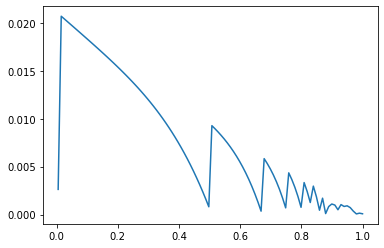

In [22]:
print(out_impr)
plt.plot(hs[::-1], np.abs(out_impr - true))
plt.show()

In [1]:
from scipy import interpolate
from scipy.special import gamma

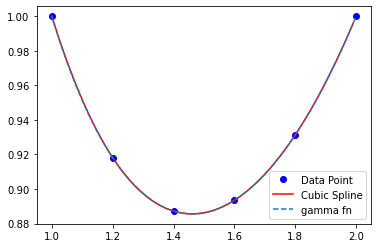

In [8]:
x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2.0])
y = gamma(x)
arr = np.arange(np.amin(x), np.amax(x), 0.01)
s = interpolate.CubicSpline(x, y)
plt.plot(x, y, 'bo', label='Data Point')
plt.plot(arr, s(arr), 'r-', label='Cubic Spline')
linsp = np.linspace(1,2,2251)
plt.plot(linsp, gamma(linsp), linestyle='dashed', label='gamma fn')
plt.legend()
plt.show()

In [10]:
s.c.T

array([[-0.32610957,  0.8322449 , -0.56256089,  1.        ],
       [-0.32610957,  0.63657916, -0.26879607,  0.91816874],
       [-0.09068663,  0.44091341, -0.05329756,  0.88726382],
       [-0.00358974,  0.38650143,  0.11218541,  0.89351535],
       [-0.00358974,  0.38434759,  0.26635522,  0.93138377]])